In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for charts
sns.set(style='whitegrid')

file_path = '../data/mission_hospital.xlsx'  # Your local file path
xls = pd.ExcelFile(file_path)

# Check available sheet names
print(xls.sheet_names)


['Copyright @ IIMB', 'Data Description', 'MH-Raw Data', 'MH-Modified Data', 'Sheet1']


In [106]:
df = xls.parse('MH-Modified Data')

# Thorough column cleanup
import re

df.columns = (
    df.columns
    .str.strip()                                 # remove leading/trailing whitespace
    .str.replace('\u00a0', ' ', regex=False)     # non-breaking space → space
    .str.replace('–', '-', regex=False)          # en dash → dash
    .str.replace('—', '-', regex=False)          # em dash → dash
    .str.replace(' +', ' ', regex=True)          # multiple spaces → single space
    .str.replace(r'\s*-\s*', '-', regex=True)     # space(s) around dashes → remove
)



In [107]:
#What it shows: Mean, std, min, max, percentiles for each numeric column, this helps spot outliers and skewness
df.describe()


,SL.,AGE,MALE,UNMARRIED,ACHD,CAD-DVD,CAD-SVD,CAD-TVD,CAD-VSD,OS-ASD,...,TRANSFERRED,ALERT,ELECTIVE,TOTAL COST TO HOSPITAL,Ln(Total Cost),TOTAL LENGTH OF STAY,LENGTH OF STAY-ICU,LENGTH OF STAY-WARD,IMPLANT,COST OF IMPLANT
count,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,...,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000,248.000000
mean,124.500000,28.879837,0.330645,0.564516,0.076613,0.108871,0.008065,0.096774,0.004032,0.060484,...,0.016129,0.995968,0.870968,198723.330282,12.062084,11.612903,3.475806,8.153226,0.197581,8544.201613
std,71.735626,25.899359,0.471397,0.496823,0.266514,0.312107,0.089621,0.296248,0.063500,0.238863,...,0.126227,0.063500,0.335914,122587.492984,0.505390,5.392617,3.853520,3.755793,0.398979,21521.877503
min,1.000000,0.032877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,46093.000000,10.738416,3.000000,0.000000,0.000000,0.000000,0.000000
25%,62.750000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,131652.750000,11.787923,8.000000,1.000000,6.000000,0.000000,0.000000
50%,124.500000,15.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,162660.500000,11.999419,10.000000,2.000000,7.000000,0.000000,0.000000
75%,186.250000,55.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,220614.000000,12.304170,13.000000,4.000000,10.000000,0.000000,0.000000
max,248.000000,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,887350.000000,13.695995,41.000000,30.000000,22.000000,1.000000,196848.000000


In [108]:
#Some columns may have missing values, so need to drop them, impute them, and potentially figure out why 
df.isnull().sum().sort_values(ascending=False)

PAST MEDICAL HISTORY CODE       173
KEY COMPLAINTS-CODE              36
CREATININE                       33
BP-LOW                           23
BP-HIGH                          23
UREA                             13
HB                                2
TRANSFERRED                       0
hypertension1                     0
hypertension2                     0
hypertension3                     0
other                             0
MODE OF ARRIVAL                   0
AMBULANCE                         0
SL.                               0
Diabetes2                         0
ALERT                             0
TYPE OF ADMSN                     0
ELECTIVE                          0
TOTAL COST TO HOSPITAL            0
Ln(Total Cost)                    0
TOTAL LENGTH OF STAY              0
LENGTH OF STAY-ICU                0
LENGTH OF STAY-WARD               0
IMPLANT USED (Y/N)                0
IMPLANT                           0
STATE AT THE TIME OF ARRIVAL      0
RR                          

In [109]:
#impute


#for numerical columns. use median because it's less sensitive to outliers than mean
num_cols = ['CREATININE', 'UREA', 'BP-LOW', 'BP-HIGH', 'HB']
for col in num_cols:
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)


#for categorical columns. just fill with unknown
cat_cols = ['PAST MEDICAL HISTORY CODE', 'KEY COMPLAINTS-CODE']
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')



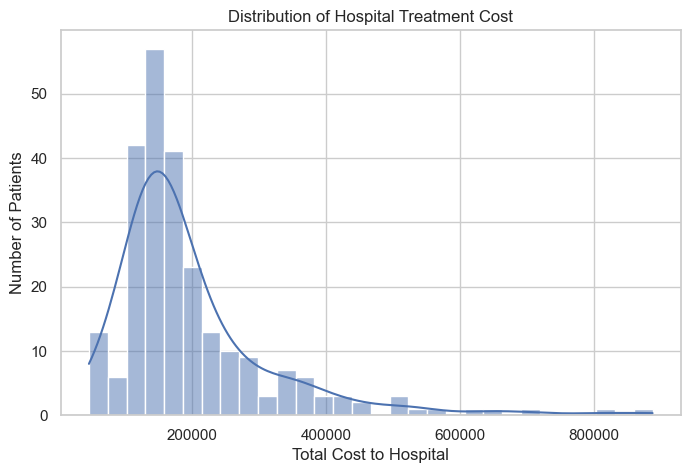

In [110]:
plt.figure(figsize=(8, 5))
sns.histplot(df['TOTAL COST TO HOSPITAL'], kde=True)
plt.title('Distribution of Hospital Treatment Cost')
plt.xlabel('Total Cost to Hospital')
plt.ylabel('Number of Patients')
plt.show()



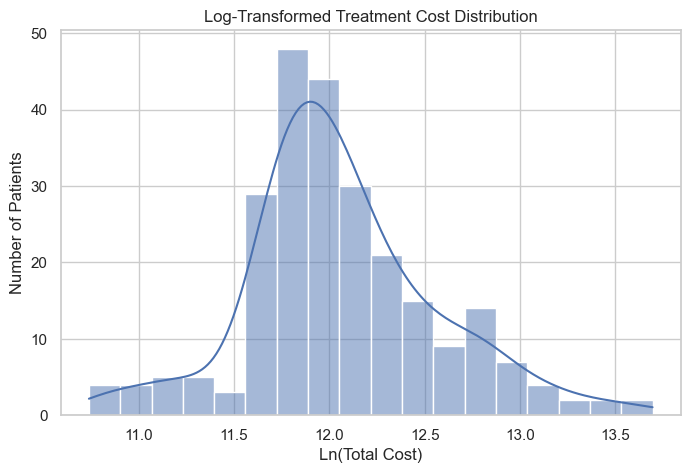

In [111]:
import numpy as np

# Add a log-transformed column if not already there
df['Ln(Total Cost)'] = np.log(df['TOTAL COST TO HOSPITAL'] + 1)

plt.figure(figsize=(8, 5))
sns.histplot(df['Ln(Total Cost)'], kde=True)
plt.title('Log-Transformed Treatment Cost Distribution')
plt.xlabel('Ln(Total Cost)')
plt.ylabel('Number of Patients')
plt.show()


In [112]:
# Select meaningful features based on medical and logistical relevance
selected_features = [
    'AGE', 'MALE', 'UNMARRIED',
    'HR PULSE', 'BP-LOW', 'BP-HIGH', 'RR',
    'BODY HEIGHT', 'BODY WEIGHT',
    'IMPLANT USED (Y/N)', 'COST OF IMPLANT',
    'TOTAL LENGTH OF STAY', 'LENGTH OF STAY-ICU', 'LENGTH OF STAY-WARD',
    'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2', 'hypertension3',
    'MODE OF ARRIVAL', 'TYPE OF ADMSN', 'ELECTIVE',
    'GENDER'  # Categorical column — will encode next
]

# Subset the data including the target column
df_model = df[selected_features + ['Ln(Total Cost)']].copy()

# Convert 'Y/N' column into '0/1'
df_model['IMPLANT USED (Y/N)'] = df_model['IMPLANT USED (Y/N)'].map({'Y': 1, 'N': 0})

# Encode categorical variables using one-hot encoding
df_model = pd.get_dummies(
    df_model,
    columns=['GENDER', 'MODE OF ARRIVAL', 'TYPE OF ADMSN', 'IMPLANT USED (Y/N)', 'UNMARRIED', 'ELECTIVE'],
    drop_first=True
)


# View result
df_model.head()

X = df_model.drop(columns=['Ln(Total Cost)'])  # Features
y = df_model['Ln(Total Cost)']                 # Target

from sklearn.model_selection import train_test_split

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.columns)
print(X_train.dtypes)

Index(['AGE', 'MALE', 'HR PULSE', 'BP-LOW', 'BP-HIGH', 'RR', 'BODY HEIGHT',
       'BODY WEIGHT', 'COST OF IMPLANT', 'TOTAL LENGTH OF STAY',
       'LENGTH OF STAY-ICU', 'LENGTH OF STAY-WARD', 'Diabetes1', 'Diabetes2',
       'hypertension1', 'hypertension2', 'hypertension3', 'GENDER_M',
       'MODE OF ARRIVAL_TRANSFERRED', 'MODE OF ARRIVAL_WALKED IN',
       'TYPE OF ADMSN_EMERGENCY', 'IMPLANT USED (Y/N)_1', 'UNMARRIED_1',
       'ELECTIVE_1'],
      dtype='object')
AGE                            float64
MALE                             int64
HR PULSE                         int64
BP-LOW                         float64
BP-HIGH                        float64
RR                               int64
BODY HEIGHT                      int64
BODY WEIGHT                    float64
COST OF IMPLANT                  int64
TOTAL LENGTH OF STAY             int64
LENGTH OF STAY-ICU               int64
LENGTH OF STAY-WARD              int64
Diabetes1                        int64
Diabetes2           

In [113]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train on the training set
lr_model.fit(X_train, y_train)

# Predict on both train and test sets
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print("📊 Linear Regression Performance on Test Set")
print(f"MAE:  {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")

predicted_actual_costs = np.exp(y_test_pred)
actual_costs = np.exp(y_test)

# Preview first few
pd.DataFrame({
    'Predicted Cost': predicted_actual_costs,
    'Actual Cost': actual_costs
}).head()


📊 Linear Regression Performance on Test Set
MAE:  0.157
RMSE: 0.237
R²:   0.757


,Predicted Cost,Actual Cost
33,288460.393025,359281.0
6,425319.209521,887351.0
182,250639.282779,233377.0
86,335608.204629,308818.0
156,115711.572328,132227.0


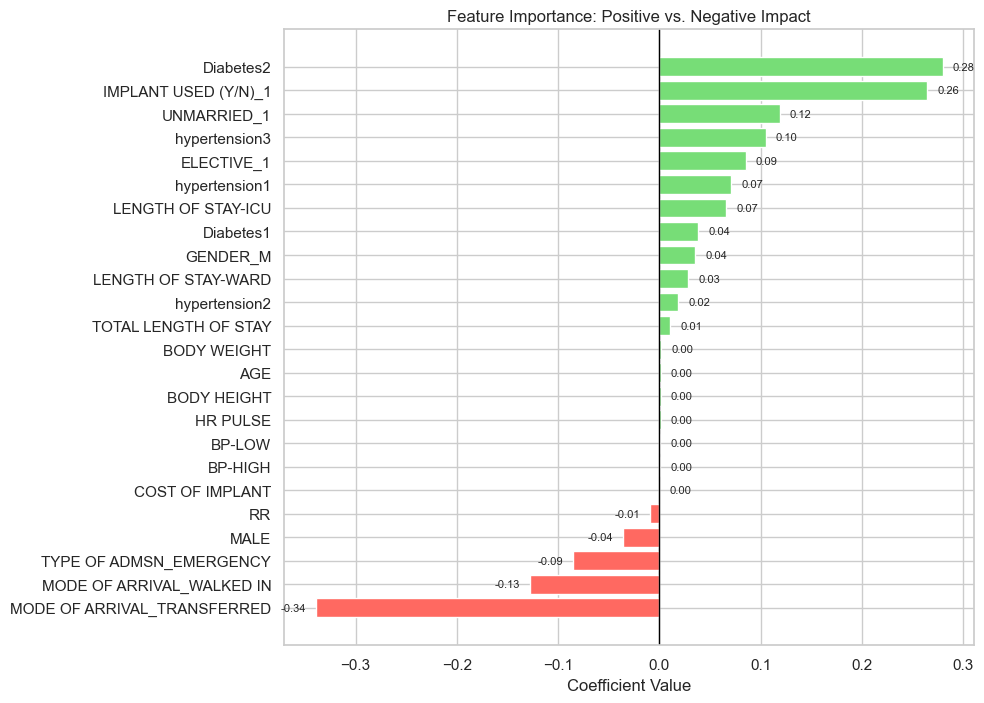

In [114]:
# Feature importance from linear regression coefficients
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
})

# Sort by absolute value of coefficients (most impactful first)
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# View top features
feature_importance

import matplotlib.pyplot as plt

# Sort for better visualization
feature_importance_sorted = feature_importance.sort_values('Coefficient', ascending=True)

plt.figure(figsize=(10, len(feature_importance_sorted) * 0.3))
bars = plt.barh(
    feature_importance_sorted['Feature'],
    feature_importance_sorted['Coefficient'],
    color=['#ff6961' if coef < 0 else '#77dd77' for coef in feature_importance_sorted['Coefficient']]
)

# Add coefficient value labels next to each bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width + 0.01 if width > 0 else width - 0.01,  # offset based on direction
        bar.get_y() + bar.get_height() / 2,
        f"{width:.2f}",
        va='center',
        ha='left' if width > 0 else 'right',
        fontsize=8
    )

plt.axvline(0, color='black', linewidth=1)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance: Positive vs. Negative Impact')
plt.tight_layout()
plt.show()





In [115]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# -----------------------------
# 1. Select meaningful features
# -----------------------------
selected_features = [
    'AGE', 'MALE', 'UNMARRIED',
    'HR PULSE', 'BP-LOW', 'BP-HIGH', 'RR',
    'BODY HEIGHT', 'BODY WEIGHT',
    'IMPLANT USED (Y/N)', 'COST OF IMPLANT',
    'TOTAL LENGTH OF STAY', 'LENGTH OF STAY-ICU', 'LENGTH OF STAY-WARD',
    'Diabetes1', 'Diabetes2', 'hypertension1', 'hypertension2', 'hypertension3',
    'MODE OF ARRIVAL', 'TYPE OF ADMSN', 'ELECTIVE',
    'GENDER'  # for one-hot encoding
]

# -----------------------------
# 2. Subset and encode
# -----------------------------
df_model = df[selected_features + ['Ln(Total Cost)']].copy()

df_model['IMPLANT USED (Y/N)'] = df_model['IMPLANT USED (Y/N)'].map({'Y': 1, 'N': 0})


# One-hot encode categorical columns
df_model = pd.get_dummies(df_model, columns=['GENDER', 'MODE OF ARRIVAL', 'TYPE OF ADMSN'], drop_first=True)

# -----------------------------
# 3. Normalize numeric features
# -----------------------------
num_features = [
    'AGE', 'HR PULSE', 'BP-LOW', 'BP-HIGH', 'RR',
    'BODY HEIGHT', 'BODY WEIGHT',
    'COST OF IMPLANT', 'TOTAL LENGTH OF STAY',
    'LENGTH OF STAY-ICU', 'LENGTH OF STAY-WARD'
]

scaler = StandardScaler()
df_model[num_features] = scaler.fit_transform(df_model[num_features])

# -----------------------------
# 4. Train-test split
# -----------------------------
X = df_model.drop(columns=['Ln(Total Cost)'])
y = df_model['Ln(Total Cost)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 5. Train model
# -----------------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# -----------------------------
# 6. Evaluate
# -----------------------------
y_test_pred = lr_model.predict(X_test)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2 = r2_score(y_test, y_test_pred)

print("📊 Linear Regression Performance on Test Set")
print(f"MAE:   {mae:.3f}")
print(f"RMSE:  {rmse:.3f}")
print(f"R²:    {r2:.3f}")

# -----------------------------
# 7. Show predictions (back-transformed)
# -----------------------------
predicted_actual_costs = np.exp(y_test_pred)
actual_costs = np.exp(y_test)

pd.DataFrame({
    'Predicted Cost': predicted_actual_costs,
    'Actual Cost': actual_costs
}).head()


📊 Linear Regression Performance on Test Set
MAE:   0.157
RMSE:  0.237
R²:    0.757


,Predicted Cost,Actual Cost
33,288460.393025,359281.0
6,425319.209521,887351.0
182,250639.282779,233377.0
86,335608.204629,308818.0
156,115711.572328,132227.0


python(18440) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


🌲 Random Forest Performance on Test Set
MAE:   0.168
RMSE:  0.242
R²:    0.747


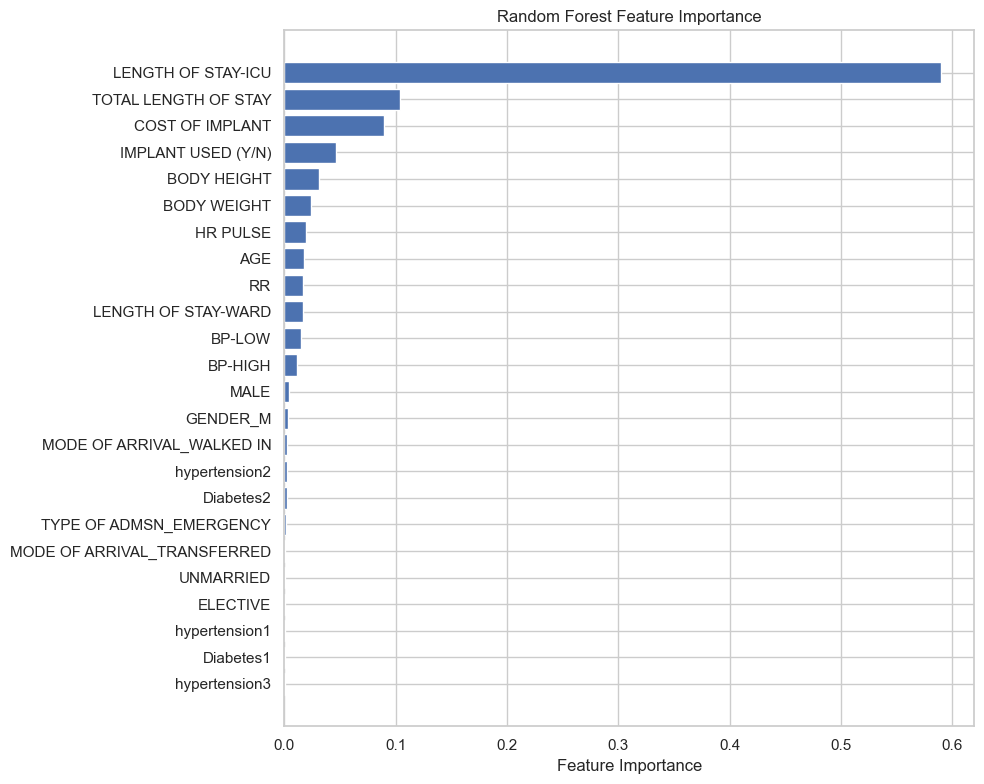

In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1. Train Random Forest
# -----------------------------
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1  # Use all cores
)
rf_model.fit(X_train, y_train)

# -----------------------------
# 2. Evaluate Model
# -----------------------------
y_rf_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_rf_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_rf_pred))
r2 = r2_score(y_test, y_rf_pred)

print("🌲 Random Forest Performance on Test Set")
print(f"MAE:   {mae:.3f}")
print(f"RMSE:  {rmse:.3f}")
print(f"R²:    {r2:.3f}")

# -----------------------------
# 3. Feature Importance Plot
# -----------------------------
importances = rf_model.feature_importances_
features = X_train.columns
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.barh(range(len(importances)), importances[sorted_idx])
plt.yticks(range(len(importances)), features[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()
